In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


if not os.path.isdir('MATH448001'):
    !git clone https://github.com/CihanSoylu/MATH448001.git

from MATH448001.programming_lectures.utils import cnn_utils

Cloning into 'MATH448001'...
remote: Enumerating objects: 234, done.
remote: Counting objects: 100% (234/234), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 234 (delta 140), reused 166 (delta 74), pack-reused 0
Receiving objects: 100% (234/234), 1.72 MiB | 1.88 MiB/s, done.
Resolving deltas: 100% (140/140), done.


# Mnist

In [0]:
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


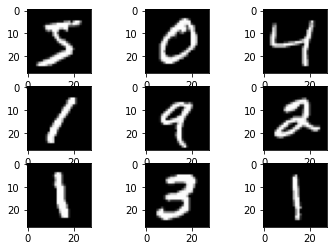

In [0]:
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap= 'gray')


In [0]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.
x_val = x_val.reshape(-1, 28, 28, 1) / 255.

In [0]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [0]:
tf.keras.backend.clear_session()

opt = tf.keras.optimizers.SGD(learning_rate = 0.01)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=opt,
              loss=loss,
              metrics=[acc])

history = model.fit(x_train, y_train, epochs=10, batch_size = 16,
                    validation_data=(x_val, y_val))

# RGB images

More information about the data is [here](http://vision.stanford.edu/aditya86/ImageNetDogs/main.html). 

In [0]:
x_train, y_train, x_val, y_val = cnn_utils.load_dogs()

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteKD67L0/stanford_dogs-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteKD67L0/stanford_dogs-test.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [0]:
x_train.shape

(10000, 160, 160, 3)

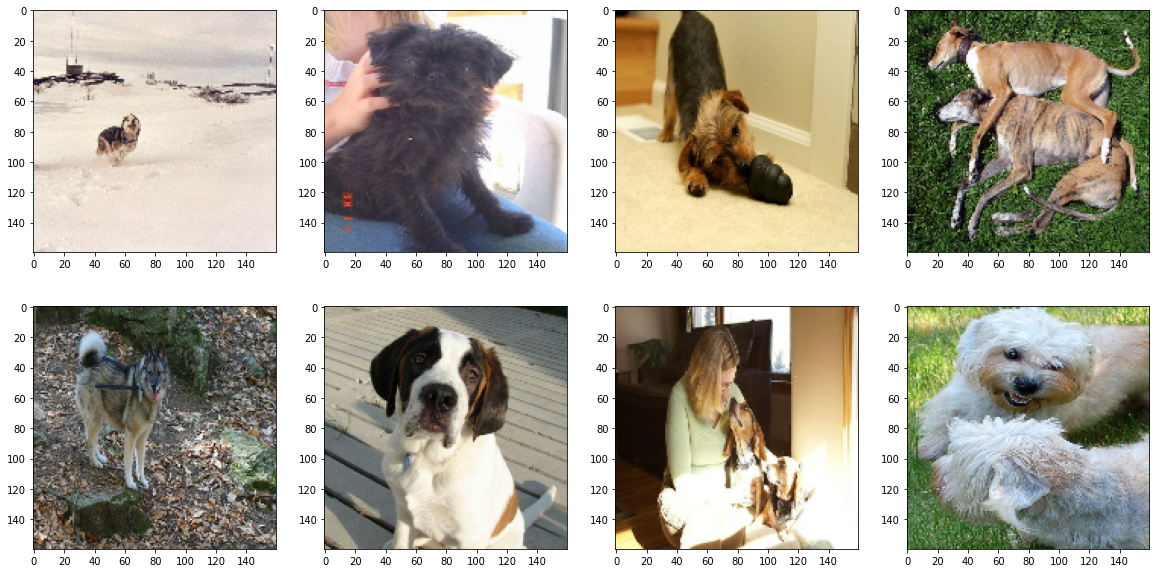

In [0]:
plt.figure(figsize=(20,10))
for i in range(8):
    plt.subplot(2,4, i+1)
    plt.imshow((x_train[i] + 1)/2)

In [0]:
def create_cnn(input_shape):

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(120, activation='softmax'))


    return model

In [0]:
tf.keras.backend.clear_session()

model = create_cnn((160,160,3))

opt = tf.keras.optimizers.SGD(learning_rate = 0.01)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=opt,
              loss=loss,
              metrics=[acc])

history = model.fit(x_train, y_train, epochs=30, batch_size = 16,
                    validation_data=(x_val, y_val))

Epoch 1/30
625/625 [==============================] - 6s 9ms/step - loss: 4.7885 - sparse_categorical_accuracy: 0.0087 - val_loss: 4.7886 - val_sparse_categorical_accuracy: 0.0050
Epoch 2/30
625/625 [==============================] - 6s 9ms/step - loss: 4.7872 - sparse_categorical_accuracy: 0.0089 - val_loss: 4.7889 - val_sparse_categorical_accuracy: 0.0045
Epoch 3/30
625/625 [==============================] - 6s 9ms/step - loss: 4.7862 - sparse_categorical_accuracy: 0.0093 - val_loss: 4.7887 - val_sparse_categorical_accuracy: 0.0065
Epoch 4/30
625/625 [==============================] - 6s 9ms/step - loss: 4.7850 - sparse_categorical_accuracy: 0.0099 - val_loss: 4.7883 - val_sparse_categorical_accuracy: 0.0060
Epoch 5/30
625/625 [==============================] - 6s 9ms/step - loss: 4.7834 - sparse_categorical_accuracy: 0.0105 - val_loss: 4.7872 - val_sparse_categorical_accuracy: 0.0040
Epoch 6/30
625/625 [==============================] - 6s 9ms/step - loss: 4.7807 - sparse_categorica

Transfer learning

In [0]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(160,160,3),
                                                     include_top=False,
                                                     weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
pretrained_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
pretrained_model.trainable = False

model = tf.keras.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(120, activation = 'softmax'))

In [0]:
tf.keras.backend.clear_session()

opt = tf.keras.optimizers.SGD(learning_rate = 0.01)

loss = tf.keras.losses.SparseCategoricalCrossentropy()

acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=opt,
              loss=loss,
              metrics=[acc])

history = model.fit(x_train, y_train, epochs=5, batch_size = 32,
                    validation_data=(x_val, y_val))

Epoch 1/5
313/313 [==============================] - 18s 58ms/step - loss: 0.4377 - sparse_categorical_accuracy: 0.9008 - val_loss: 0.7027 - val_sparse_categorical_accuracy: 0.7830
Epoch 2/5
313/313 [==============================] - 17s 56ms/step - loss: 0.4180 - sparse_categorical_accuracy: 0.9088 - val_loss: 0.6975 - val_sparse_categorical_accuracy: 0.7845
Epoch 3/5
313/313 [==============================] - 17s 55ms/step - loss: 0.4000 - sparse_categorical_accuracy: 0.9134 - val_loss: 0.6897 - val_sparse_categorical_accuracy: 0.7865
Epoch 4/5
313/313 [==============================] - 17s 55ms/step - loss: 0.3837 - sparse_categorical_accuracy: 0.9179 - val_loss: 0.6839 - val_sparse_categorical_accuracy: 0.7885
Epoch 5/5
313/313 [==============================] - 18s 56ms/step - loss: 0.3687 - sparse_categorical_accuracy: 0.9213 - val_loss: 0.6801 - val_sparse_categorical_accuracy: 0.7860
